In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import get_ipython
ipy = get_ipython()
if ipy is not None:
    ipy.run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
df.shape

(150, 5)

In [31]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [33]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [35]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<AxesSubplot:ylabel='species'>

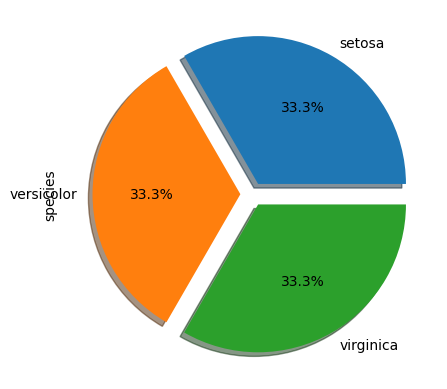

In [36]:
df['species'].value_counts().plot(kind = 'pie',  autopct = '%1.1f%%', shadow = True, explode = [0.08,0.08,0.08])

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
df['species'].unique()

array([0, 1, 2])

In [39]:
from sklearn.model_selection import train_test_split

features = ['sepal_length','sepal_width','petal_length','petal_width']
X = df.loc[:, features].values   #defining the feature matrix
Y = df.species

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 40,random_state=0)

In [40]:
X_Train.shape

(110, 4)

In [41]:
Y_Train.shape

(110,)

In [42]:
Y_Test.shape

(40,)

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_Train = sc.fit_transform(X_Train)
X_Test = sc.transform(X_Test)

In [44]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import  classification_report
from sklearn.metrics import confusion_matrix

In [45]:
#Model Creation
from sklearn.linear_model import LogisticRegression
log_model= LogisticRegression(random_state = 0)
log_model.fit(X_Train, Y_Train)

# model training
log_model.fit(X_Train, Y_Train)

# Predicting
Y_Pred_Test_log_res=log_model.predict(X_Test)

In [46]:
Y_Pred_Test_log_res

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1])

In [47]:
print(classification_report(Y_Test, Y_Pred_Test_log_res))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        18
           2       0.90      1.00      0.95         9

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [48]:
confusion_matrix(Y_Test,Y_Pred_Test_log_res )

array([[13,  0,  0],
       [ 0, 17,  1],
       [ 0,  0,  9]], dtype=int64)